# Plotting the Herzsprung Russell Diagram for the Pal 3 Star Cluster

In [10]:
# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve


import pandas as pd
import numpy as np
import matplotlib

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

from IPython.display import Image

# Set up matplotlib and use a nicer set of plot parameters
import matplotlib.pyplot as plt
%matplotlib inline

Based on the SDSS exercise
http://skyserver.sdss.org/dr4/en/proj/advanced/hr/globularcluster.asp

Useful references
https://arxiv.org/pdf/0808.0001.pdf

https://arxiv.org/pdf/1511.03606.pdf


Using the data from your search, create an H-R diagram for Pal 3. Graph r on the y-axis and g-r on the x-axis. Remember to reverse the values on the y-axis so brighter stars are at the top. You may also want to adjust the min and max values of the axes to give a better view of the H-R diagram.

apply to other globular clusters in SDSS e.g.
ngc 2419
Pal 3
Pal 4
ngc 4147
ngc 5024
M53
ngc 5053
ngc 5272
M3
ngc 5466
Pal 5
ngc 5904
M5
Pal 14
ngc 6205
M13
ngc 6341
M92
ngc 6838
M71
ngc 7006
ngc 7078
M15
ngc 7089
M2


Select stars from the pal3 cluster
use 

The SkyCoord class in the astropy.coordinates package is used to represent celestial coordinates. First, we'll make a SkyCoord object based on our object's name, "Hickson Compact Group 7", or "HCG 7" for short. Most astronomical object names can be found by SESAME, a service which queries Simbad, NED, and VizieR and returns the object's type and its J2000 position. This service can be used via the SkyCoord.from_name() class method:

In [14]:
# initialize a SkyCoord object named hcg7_center at the location of HCG 7
pal3_center = SkyCoord.from_name('pal3')
print(pal3_center.ra, pal3_center.dec)
print(pal3_center.ra.hour, pal3_center.dec)                                 

151d22m44.4s 0d04m15.3984s
10.091933333333335 0d04m15.3984s


Plot the image to see what the cluster looks like

Now that we have a SkyCoord object, we can try to use it to access data from the Sloan Digitial Sky Survey (SDSS). Let's start by trying to get a picture using the SDSS image cutout service to make sure PAL3 is in the SDSS footprint and has good image quality.

This requires an internet connection, but if it fails, don't worry: the file is included in the repository so you can just let it use the local file'PAL3_SDSS_cutout.jpg', defined at the top of the cell. 

In [4]:
# tell the SDSS service how big of a cutout we want
im_size = 12*u.arcmin # get a 12 arcmin square
im_pixels = 1024 
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=pal3_center.ra.deg, 
                              dec=pal3_center.dec.deg, 
                              width=im_pixels, height=im_pixels, 
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
#urlretrieve(url, 'PAL3_SDSS_cutout.jpg')
urlretrieve(url, 'NGC2419_SDSS_cutout.jpg')

NameError: name 'u' is not defined

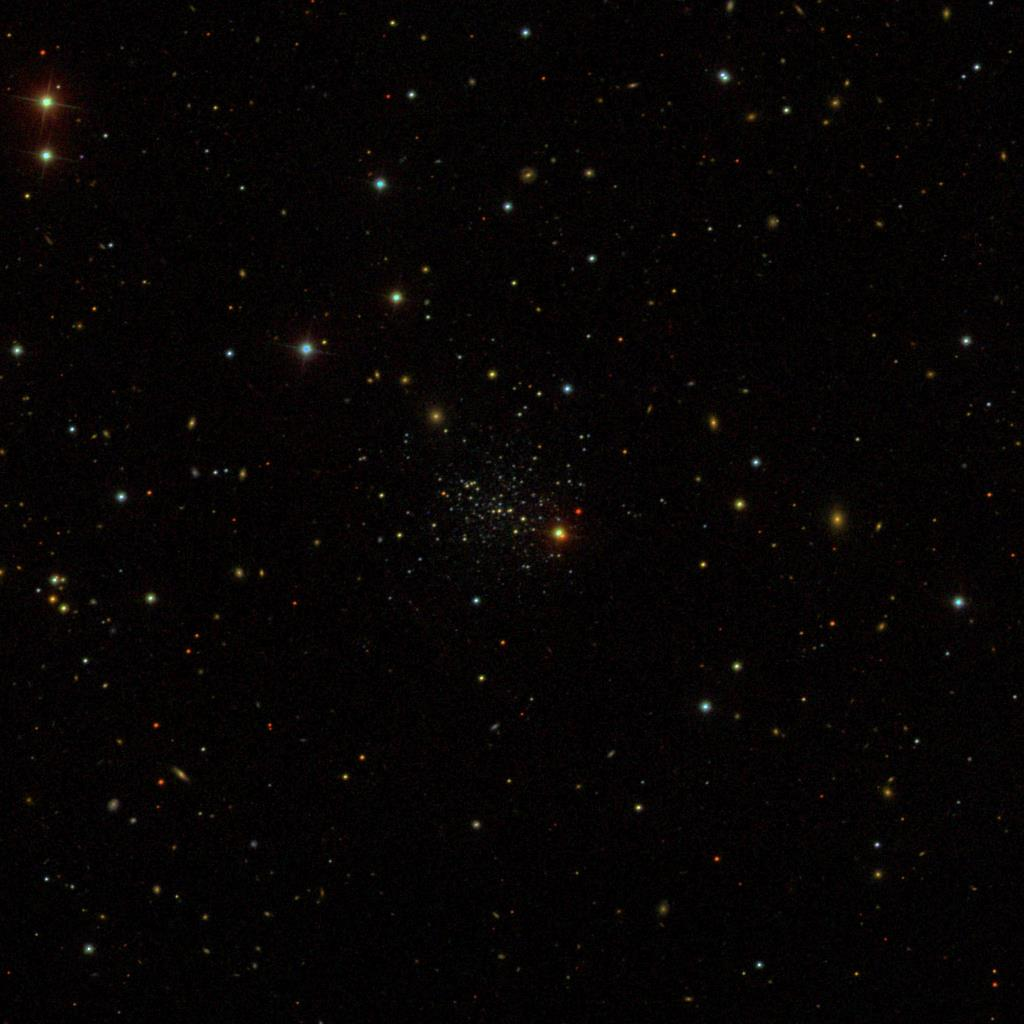

In [16]:
#Image('PAL3_SDSS_cutout.jpg')
Image('NGC2419_SDSS_cutout.jpg')

Here is some data we selected using the SDSS navigation tool
http://skyserver.sdss.org/dr4/en/tools/chart/navi.asp

Enter the coordinates for Pal 3 (RA = 151.3801, DEC =0.072) and click "Get Image." Pal 3 will appear in the main window. You can zoom in or out in the image with the zoom bar below Get Image. Click the plus sign to zoom in or the minus sign to zoom out. You can also move around in the sky by clicking the NWSE buttons around the image.

When you click on any star in the image, a green square will come up around it. A close-up of the object will appear in the top right, and the object's data will appear at the right. Click "Add to Notes" to save the star's data in your notebook.

Use the data you find to make an H-R diagram of the globular cluster. Put the r magnitude on the y-axis and the g-r color on the x-axis (hint: you can save your notebook as CSV, then open it directly into an Excel spreadsheet).

Try to take stars only from the cluster. Stars that appear dramatically different may be at different distances along the same line of sight. You should also be careful not to accidentally record the information for a galaxy. Try to get at least 20 to 30 stars for your diagram.

In [17]:
df = pd.read_csv('globout/pal3_star_characters.csv')
df


,objid,type,ra,dec,u,g,r,i,z,redshift
0,1237654670273085455,STAR,151.366072,0.071219,22.92664,19.81081,18.31491,16.74024,15.88559,Null
1,1237654670273085456,STAR,151.376850,0.069743,20.68613,18.50849,17.61987,17.27860,17.13025,Null
2,1237654670273085457,STAR,151.381494,0.071317,21.12591,18.80796,17.82602,17.44064,17.22286,Null
3,1237654670273085458,STAR,151.378323,0.067267,21.22374,19.00640,18.10201,17.72441,17.52119,Null
4,1237654670273085460,STAR,151.392399,0.074727,22.75344,20.38908,18.97764,18.19298,17.85298,Null
5,1237654670273085461,STAR,151.387787,0.076165,21.73801,19.70925,18.84676,18.53374,18.43503,Null
6,1237654670273085462,STAR,151.386916,0.076643,21.63330,19.71418,19.01131,18.70630,18.57787,Null
7,1237654670273085463,STAR,151.382663,0.071186,21.50601,19.70885,19.05330,18.72654,18.59801,Null
8,1237654670273085464,STAR,151.388298,0.065790,21.58615,19.91948,19.17210,18.84082,18.70199,Null
9,1237654670273085466,STAR,151.385759,0.075584,21.97993,20.24455,19.55824,19.23221,19.29562,Null


In [18]:
df.iloc[:,6]
df.iloc[:,5]-df.iloc[:,6]

0     1.49590
1     0.88862
2     0.98194
3     0.90439
4     1.41144
5     0.86249
6     0.70287
7     0.65555
8     0.74738
9     0.68631
10    0.64049
11   -2.46177
12   -2.46425
13   -6.28378
14    0.56625
15    0.77733
16    0.46532
17    0.36824
18    0.56591
19    0.72686
20    0.92530
21    0.67751
dtype: float64

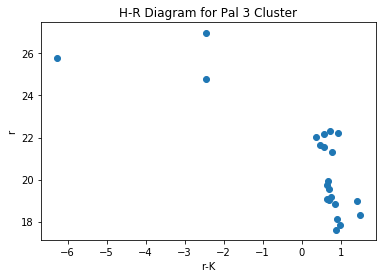

In [19]:
rmag = df.iloc[:,6]
grcolor = df.iloc[:,5]-df.iloc[:,6]


#plt.subplot(1, 2, 1)
plt.scatter(grcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.title('H-R Diagram for Pal 3 Cluster')
#plt.xlim(2.5, 4)
#plt.ylim(18, 12) #mags go backwards!

Import the same tableas an astropy table

Astropy provides functionality for reading in and manipulating tabular data through the astropy.table subpackage. An additional set of tools for reading and writing ASCII data are provided with the astropy.io.ascii subpackage, but fundamentally use the classes and methods implemented in astropy.table.

We'll start by importing the ascii subpackage:


In [20]:
from astropy.table import Table
from astropy.io import ascii

In [21]:
tbl = ascii.read("globout/pal3_star_characters.csv")
tbl



objid,type,ra,dec,u,g,r,i,z,redshift
str19,str4,float64,float64,float64,float64,float64,float64,float64,str4
1237654670273085455,STAR,151.366072423206,0.0712192264207298,22.92664,19.81081,18.31491,16.74024,15.88559,Null
1237654670273085456,STAR,151.376850286103,0.0697434777455712,20.68613,18.50849,17.61987,17.2786,17.13025,Null
1237654670273085457,STAR,151.381493800155,0.0713168437414612,21.12591,18.80796,17.82602,17.44064,17.22286,Null
1237654670273085458,STAR,151.37832336098,0.067266963450618,21.22374,19.0064,18.10201,17.72441,17.52119,Null
1237654670273085460,STAR,151.392399003754,0.0747268494208747,22.75344,20.38908,18.97764,18.19298,17.85298,Null
1237654670273085461,STAR,151.387786587234,0.0761654614713545,21.73801,19.70925,18.84676,18.53374,18.43503,Null
1237654670273085462,STAR,151.386915592525,0.0766428859591595,21.6333,19.71418,19.01131,18.7063,18.57787,Null
1237654670273085463,STAR,151.382663458637,0.0711859797579007,21.50601,19.70885,19.0533,18.72654,18.59801,Null
1237654670273085464,STAR,151.388297748635,0.0657899822515396,21.58615,19.91948,19.1721,18.84082,18.70199,Null


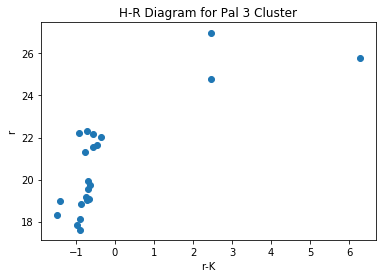

In [22]:
tbl["objid"]
rmag = tbl["r"]
grcolor = tbl["r"]-tbl["g"]

#plt.subplot(1, 2, 1)
plt.scatter(grcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.title('H-R Diagram for Pal 3 Cluster')
#plt.xlim(2.5, 4)
#plt.ylim(18, 12) #mags go backwards!

In [23]:
from astroquery.sdss import SDSS
#query = "select top 10                        z, ra, dec, bestObjID                      from                        specObj                      where                        class = 'galaxy'                        and z > 0.3                        and zWarning = 0"
query = " select s.objid, s.ra, s.dec, s.u, s.g, s.r, s.i, s.z from star s, dbo.fGetNearbyObjEq(229.0128,-0.1082,3) n where s.objid = n.objid "
res = SDSS.query_sql(query)
#print(res[:5])
print(res[0][0])

C:\Users\suilven\AppData\Local\conda\conda\envs\tutorials\lib\site-packages\astroquery\sdss\__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


1237648721252188507


In [24]:
rmag2 = res[5][:]
grcolor2 = res[4][:] #-res[:][5]
print(rmag2)
print(grcolor2)

   r    
--------
20.49829
19.34751
19.98369
19.85122
 24.8971
20.18116
13.37685
17.76618
19.39736
 19.8518
     ...
21.03505
22.00338
22.90558
24.33698
22.16425
22.86548
22.31665
22.80814
22.73173
23.07055
23.15153
Length = 781 rows
   g    
--------
20.81661
19.94476
21.51287
20.20134
20.78204
20.54907
13.97959
18.40972
20.85493
  20.175
     ...
22.55216
22.46932
23.26062
23.33939
22.98185
23.60176
23.88621
23.99815
23.56136
24.32452
24.30833
Length = 781 rows


(26, 12)

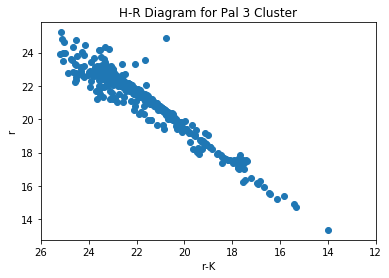

In [25]:



#plt.subplot(1, 2, 1)
plt.scatter(grcolor2, rmag2)
plt.xlabel('r-K')
plt.ylabel('r')
plt.title('H-R Diagram for Pal 3 Cluster')
plt.xlim(26, 12)
#plt.ylim(18, 12) #mags go backwards!